<a href="https://colab.research.google.com/github/samaramms/MonkeypoxTraining/blob/main/Monkeypox_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I - Importando as bibliotecas a serem utilizadas:**





In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



# **II - Importando os dataframes a serem analisados:**

1 - Casos Mundiais

In [39]:
df_monkeypox_world = pd.read_csv("/content/Monkey_Pox_Cases_Worldwide.csv")
df_monkeypox_world

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,3191.0,0.0,5.0,2.0,7.0
1,Portugal,846.0,0.0,0.0,0.0,34.0
2,Spain,6459.0,0.0,13.0,2.0,0.0
3,United States,17995.0,0.0,4.0,41.0,11.0
4,Canada,1228.0,9.0,1.0,5.0,0.0
...,...,...,...,...,...,...
115,Central African Republic,8.0,9.0,0.0,0.0,0.0
116,Republic of Congo,3.0,5.0,0.0,0.0,0.0
117,Cameroon,7.0,27.0,0.0,0.0,0.0
118,Liberia,2.0,0.0,0.0,0.0,0.0


In [40]:
df_monkeypox_world.shape #linhas e colunas, respectivamente, no dataset

(120, 6)

In [41]:
df_monkeypox_world.columns #o que há em cada coluna

Index(['Country', 'Confirmed_Cases', 'Suspected_Cases', 'Hospitalized',
       'Travel_History_Yes', 'Travel_History_No'],
      dtype='object')

In [42]:
df_monkeypox_world.isnull().sum() #verificando se há algum arquivo NaN/nulo/sem dados. Não há.

Country               0
Confirmed_Cases       0
Suspected_Cases       0
Hospitalized          0
Travel_History_Yes    0
Travel_History_No     0
dtype: int64

In [43]:
df_monkeypox_world.describe()

,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,412.566667,21.575000,1.183333,2.191667,0.733333
std,1852.031661,203.969336,2.863809,4.909767,3.627007
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000
50%,5.500000,0.000000,0.000000,1.000000,0.000000
75%,67.500000,0.000000,1.000000,3.000000,0.000000
max,17995.000000,2217.000000,18.000000,41.000000,34.000000


2 - Casos ao longo do tempo

In [44]:
casos_tempo = pd.read_csv("/content/Worldwide_Case_Detection_Timeline.csv")
casos_tempo

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
4,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
49805,2022-08-29,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49806,2022-08-29,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49807,2022-08-29,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49808,2022-08-29,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
casos_tempo.columns

Index(['Date_confirmation', 'Country', 'City', 'Age', 'Gender', 'Symptoms',
       'Hospitalised (Y/N/NA)', 'Isolated (Y/N/NA)',
       'Travel_history (Y/N/NA)'],
      dtype='object')

In [46]:
casos_tempo.isnull().sum() 
#nota: aqui há dados faltantes, entretanto, para esse caso, remover alguns objetos NaN pode levar a uma analise precipitada dos nosso dados

Date_confirmation              0
Country                        0
City                       48664
Age                        47120
Gender                     47614
Symptoms                   49629
Hospitalised (Y/N/NA)      49529
Isolated (Y/N/NA)          49425
Travel_history (Y/N/NA)    49486
dtype: int64

In [47]:
casos_tempo.describe()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
count,49810,49810,1146,2690,2196,181,281,385,324
unique,117,104,161,82,5,84,2,1,2
top,2022-08-22,United States,Toronto,20-69,male,genital ulcer lesions,N,Y,Y
freq,2063,18240,437,585,2158,30,161,385,238


**III - Tratamento e seleção dos dados a trabalhar:**

In [48]:
#traduzindo as colunas pro português (Os países seguem com nome em ingles)

renomear = {'Country' : 'País',
            'Confirmed_Cases': 'Casos Confirmados',
            'Suspected_Cases':'Casos Suspeitos',
            'Hospitalized' : 'Hospitalizados',
            'Travel_History_Yes': 'Viagem: Positivo', 
            'Travel_History_No' : 'Viagem: Negativo'}

In [49]:
df_monkeypox_world.rename(columns = renomear, inplace = True)
df_monkeypox_world


,País,Casos Confirmados,Casos Suspeitos,Hospitalizados,Viagem: Positivo,Viagem: Negativo
0,England,3191.0,0.0,5.0,2.0,7.0
1,Portugal,846.0,0.0,0.0,0.0,34.0
2,Spain,6459.0,0.0,13.0,2.0,0.0
3,United States,17995.0,0.0,4.0,41.0,11.0
4,Canada,1228.0,9.0,1.0,5.0,0.0
...,...,...,...,...,...,...
115,Central African Republic,8.0,9.0,0.0,0.0,0.0
116,Republic of Congo,3.0,5.0,0.0,0.0,0.0
117,Cameroon,7.0,27.0,0.0,0.0,0.0
118,Liberia,2.0,0.0,0.0,0.0,0.0


In [50]:
casos_mundiais = df_monkeypox_world
casos_mundiais 

,País,Casos Confirmados,Casos Suspeitos,Hospitalizados,Viagem: Positivo,Viagem: Negativo
0,England,3191.0,0.0,5.0,2.0,7.0
1,Portugal,846.0,0.0,0.0,0.0,34.0
2,Spain,6459.0,0.0,13.0,2.0,0.0
3,United States,17995.0,0.0,4.0,41.0,11.0
4,Canada,1228.0,9.0,1.0,5.0,0.0
...,...,...,...,...,...,...
115,Central African Republic,8.0,9.0,0.0,0.0,0.0
116,Republic of Congo,3.0,5.0,0.0,0.0,0.0
117,Cameroon,7.0,27.0,0.0,0.0,0.0
118,Liberia,2.0,0.0,0.0,0.0,0.0


In [51]:
casos_mundiais["País"].unique() #vendo os países que compõem essa series

array(['England', 'Portugal', 'Spain', 'United States', 'Canada',
       'Sweden', 'Italy', 'France', 'Belgium', 'Australia', 'Germany',
       'Netherlands', 'Israel', 'Switzerland', 'Greece', 'Austria',
       'Argentina', 'Denmark', 'Morocco', 'Slovenia', 'Scotland',
       'Czech Republic', 'United Arab Emirates', 'Finland', 'Wales',
       'Northern Ireland', 'Sudan', 'Bolivia', 'Iran', 'Ecuador', 'Malta',
       'Ireland', 'Mexico', 'Pakistan', 'French Guiana', 'Thailand',
       'Peru', 'Brazil', 'Malaysia', 'Hungary', 'Norway', 'Paraguay',
       'Costa Rica', 'Gibraltar', 'Mauritius', 'Haiti', 'Uruguay',
       'Latvia', 'Cayman Islands', 'Kosovo', 'Turkey', 'Bahamas', 'Ghana',
       'India', 'Iceland', 'Poland', 'Bangladesh', 'Uganda', 'Cambodia',
       'Malawi', 'Venezuela', 'Romania', 'Georgia', 'Slovakia',
       'Luxembourg', 'Nepal', 'Chile', 'Serbia', 'Lebanon', 'South Korea',
       'Singapore', 'South Africa', 'Taiwan', 'Colombia', 'Croatia',
       'Bulgaria', 'Som

Casos ao longo do tempo:

In [52]:
casos_tempo.head(5)

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
4,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN


In [53]:
casos_tempo.drop(columns = ['Date_confirmation', 'City', 'Isolated (Y/N/NA)', 'Hospitalised (Y/N/NA)', 'Travel_history (Y/N/NA)' ], inplace = True)
casos_tempo

,Country,Age,Gender,Symptoms
0,Nigeria,NaN,NaN,NaN
1,Nigeria,NaN,NaN,NaN
2,Nigeria,NaN,NaN,NaN
3,Cameroon,0-39,NaN,NaN
4,Cameroon,0-39,NaN,NaN
...,...,...,...,...
49805,United States,NaN,NaN,NaN
49806,United States,NaN,NaN,NaN
49807,United States,NaN,NaN,NaN
49808,United States,NaN,NaN,NaN


In [54]:
casos_tempo.columns

Index(['Country', 'Age', 'Gender', 'Symptoms'], dtype='object')

In [55]:
renomear_2 ={'Country' : 'País',
            'Age': 'Idade',
            'Gender':'Gênero',
            'Symptoms' : 'Sintomas'}
    

In [56]:
casos_tempo.rename(columns = renomear_2, inplace = True)
casos_tempo


,País,Idade,Gênero,Sintomas
0,Nigeria,NaN,NaN,NaN
1,Nigeria,NaN,NaN,NaN
2,Nigeria,NaN,NaN,NaN
3,Cameroon,0-39,NaN,NaN
4,Cameroon,0-39,NaN,NaN
...,...,...,...,...
49805,United States,NaN,NaN,NaN
49806,United States,NaN,NaN,NaN
49807,United States,NaN,NaN,NaN
49808,United States,NaN,NaN,NaN


# **III - Começando algumas visualizações**

* Os 10 países com maior número de casos

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

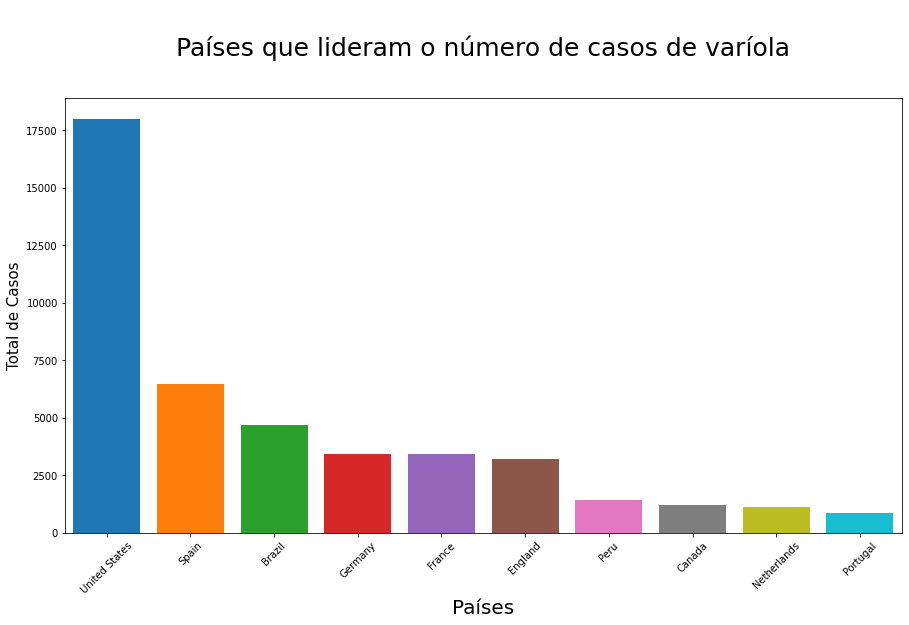

In [68]:
plt.subplots(figsize=(15,8))
casos_mundiais = casos_mundiais.sort_values(["Casos Confirmados"], ascending = False)[:10]
plot = sns.barplot(x=casos_mundiais["País"][:10],y=casos_mundiais["Casos Confirmados"], saturation=1)
plot.axes.set_title("\nPaíses que lideram o número de casos de varíola\n",fontsize= 25, pad = 15)
plt.xlabel("Países", fontsize = 20)
plt.ylabel("Total de Casos", fontsize = 15)
plt.xticks(rotation=45)

In [69]:
casos_mundiais.head(5)

,País,Casos Confirmados,Casos Suspeitos,Hospitalizados,Viagem: Positivo,Viagem: Negativo
3,United States,17995.0,0.0,4.0,41.0,11.0
2,Spain,6459.0,0.0,13.0,2.0,0.0
37,Brazil,4693.0,0.0,3.0,20.0,4.0
10,Germany,3422.0,0.0,18.0,19.0,16.0
7,France,3417.0,0.0,1.0,2.0,1.0


* Os 10 países com mais hospitalizações

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

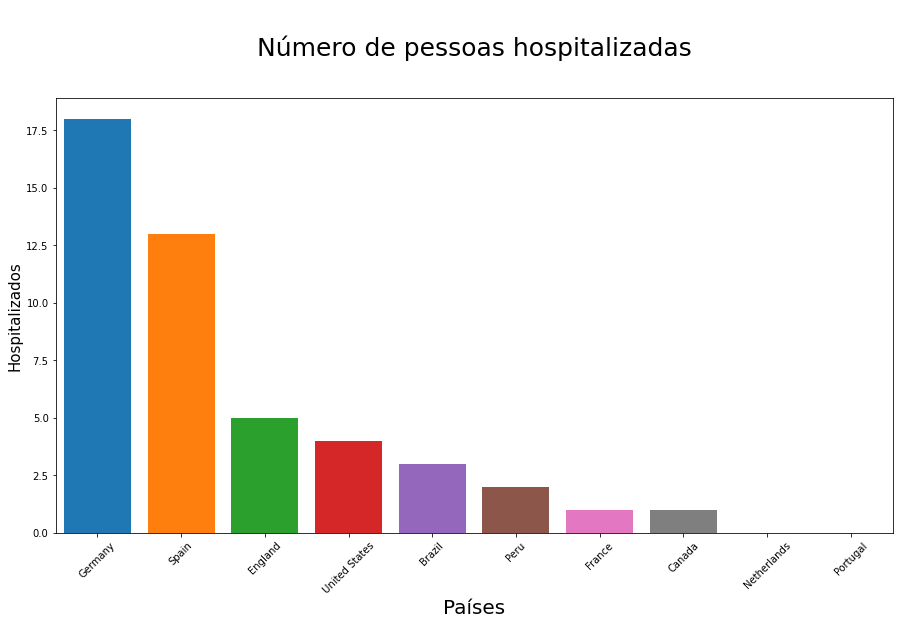

In [59]:
plt.subplots(figsize=(15,8))
casos_mundiais = casos_mundiais.sort_values(["Hospitalizados"], ascending = False)[:10]

plot = sns.barplot(x=casos_mundiais["País"][:10],y=casos_mundiais["Hospitalizados"], saturation=3)
plot.axes.set_title("\nNúmero de pessoas hospitalizadas\n",fontsize= 25, pad = 15)
plt.xlabel("Países", fontsize = 20)
plt.ylabel("Hospitalizados", fontsize = 15)
plt.xticks(rotation=45)

Mesmo com os altos números de Casos Confirmados, os casos hospitalizados ainda são baixos.
Apesar de os EUA liderarem o número de casos, a Alemanha possui o maior número de pessoas hospitalizadas

* Pessoas hospitalizadas x Casos Confirmados

In [60]:
porcentagem_hospitalizados = (casos_mundiais['Hospitalizados'].sum()/casos_mundiais['Casos Confirmados'].sum()) * 100
print('A porcentagem de pessoas hospitalizadas é de {}%'.format (porcentagem_hospitalizados.round(2)))

A porcentagem de pessoas hospitalizadas é de 0.11%


A baixa porcentagem de pessoas hospitalizadas pode nos dizer que a maioria das pessoas não tem sintomas tão graves que acabem precisando ser hospitalizadas. Entretanto, algumas pessoas podem não ir ao hospital em alguns países por não terem recursos financeiros. 

* Buscando algumas correlações:

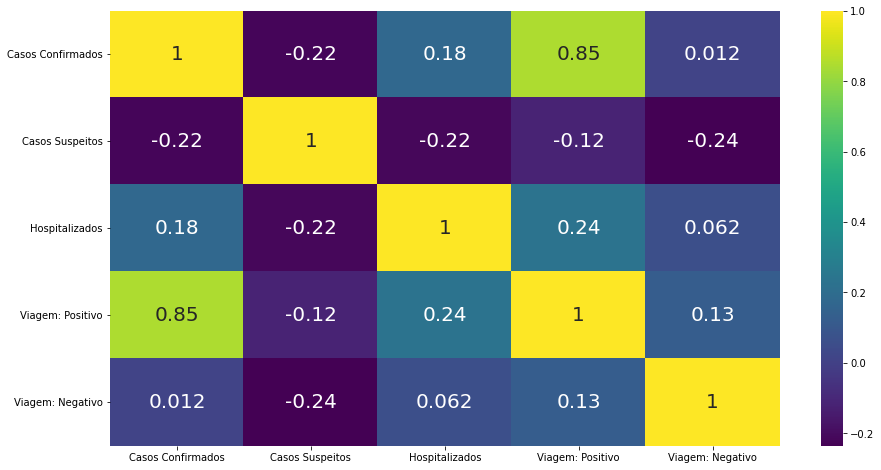

In [61]:
plt.figure(figsize=(15,8))

sns.heatmap(casos_mundiais.corr(),cmap = 'viridis', annot=True, annot_kws={"size": 20})
plt.show()

Segundo o heatmap acima, há uma forte correlação entre Pessoas que Viajaram e os Casos Confirmados. Os números de Hospitalizados que Viajaram ou Não apresentam ainda uma baixa correlação, talvez porque a porcentagem de pessoas hospitalizadas em relação aos casos confirmados seja bem baixa.

In [62]:
#Quais os sintomas mais presentes?

* E o Brasil?


In [71]:
casos_mundiais.iloc[2]

País                 Brazil
Casos Confirmados    4693.0
Casos Suspeitos         0.0
Hospitalizados          3.0
Viagem: Positivo       20.0
Viagem: Negativo        4.0
Name: 37, dtype: object

In [81]:
dados_Brasil = pd.read_csv('/content/Monkeypox_Brasil 29_08_22 - Página1.csv')
dados_Brasil.head(2)

,ESTADO,CONFIRMADOS,SUSPEITOS
0,Minas Gerais,260,707
1,Espirito Santo,31,93


In [82]:
dados_Brasil['CONFIRMADOS'].sum()

4693

Podemos ver que tanto os dados do Ministério da Saúde quanto os do Health Organization estão sem conflitos.